In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score ,confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
# from xgboost import XGBClassifier

In [2]:
df= pd.read_csv('weatherAUS.csv')
df.sample(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
95126,2012-02-29,Adelaide,18.6,19.1,0.4,4.0,0.0,SE,33.0,S,...,84.0,1012.3,1010.8,NaN,NaN,18.7,15.5,No,15.6,Yes
40710,2015-07-08,Williamtown,6.2,16.7,6.0,4.2,5.9,S,33.0,W,...,80.0,1028.0,1027.2,2.0,6.0,11.2,13.9,Yes,3.0,Yes
92053,2012-05-15,Townsville,15.8,26.9,0.0,9.0,10.3,NE,35.0,SSE,...,34.0,1018.6,1014.9,1.0,1.0,22.9,25.5,No,0.0,No
5353,2015-10-26,BadgerysCreek,12.4,24.4,0.2,NaN,NaN,WSW,52.0,NaN,...,62.0,NaN,NaN,NaN,NaN,20.4,21.9,No,13.2,Yes
33639,2011-03-17,SydneyAirport,20.5,24.4,1.2,5.8,5.9,SSW,41.0,S,...,82.0,1019.7,1017.5,7.0,4.0,21.0,23.1,Yes,0.6,No


In [3]:
print(df.shape)
print(df.isnull().sum())
df.dropna(axis=0,inplace=True)
print(df.isnull().sum())
df.shape

(142193, 24)
Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64
Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK

(56420, 24)

In [4]:
df.sample()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
76041,2009-10-17,Watsonia,9.2,16.1,2.6,2.2,2.1,SSW,35.0,SSW,...,62.0,1024.7,1025.3,7.0,7.0,12.7,14.6,Yes,0.4,No


In [147]:
df = df[(df['MinTemp']<=30) & (df['MinTemp']>=-8)]
df = df[(df['MaxTemp']<=43) & (df['MaxTemp']>=3)]
df = df[df['Rainfall']<=150]
df = df[df['Evaporation']<=20]
df = df[(df['WindGustSpeed']<=70) & (df['WindGustSpeed']>=10)]
df = df[df['WindSpeed9am']<=40]
df = df[df['WindSpeed3pm']<=40]
df = df[df['Humidity9am']>=18]
df = df[(df['Pressure9am']<=1033) & (df['Pressure9am']>=1000)]
df = df[(df['Pressure3pm']<=1033) & (df['Pressure3pm']>=998)]
df = df[df['Cloud3pm'] >=1]
df = df[(df['Temp9am']<=35) & (df['Temp9am']>=-2)]
df = df[(df['Temp3pm']<=42) & (df['Temp3pm']>=2)]
df = df[df['RISK_MM'] <=150]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48850 entries, 5939 to 139112
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           48850 non-null  object 
 1   Location       48850 non-null  object 
 2   MinTemp        48850 non-null  float64
 3   MaxTemp        48850 non-null  float64
 4   Rainfall       48850 non-null  float64
 5   Evaporation    48850 non-null  float64
 6   Sunshine       48850 non-null  float64
 7   WindGustDir    48850 non-null  object 
 8   WindGustSpeed  48850 non-null  float64
 9   WindDir9am     48850 non-null  object 
 10  WindDir3pm     48850 non-null  object 
 11  WindSpeed9am   48850 non-null  float64
 12  WindSpeed3pm   48850 non-null  float64
 13  Humidity9am    48850 non-null  float64
 14  Humidity3pm    48850 non-null  float64
 15  Pressure9am    48850 non-null  float64
 16  Pressure3pm    48850 non-null  float64
 17  Cloud9am       48850 non-null  float64
 18  Cloud3p

In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df.drop('Date', axis=1, inplace=True)

In [8]:
df = df.dropna(subset=['MinTemp', 'MaxTemp', 'Rainfall', 'WindSpeed9am',
                                 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
                                 'Temp9am', 'Temp3pm', 'RainToday'])
df.reindex()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56420 entries, 5939 to 139112
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       56420 non-null  object 
 1   MinTemp        56420 non-null  float64
 2   MaxTemp        56420 non-null  float64
 3   Rainfall       56420 non-null  float64
 4   Evaporation    56420 non-null  float64
 5   Sunshine       56420 non-null  float64
 6   WindGustDir    56420 non-null  object 
 7   WindGustSpeed  56420 non-null  float64
 8   WindDir9am     56420 non-null  object 
 9   WindDir3pm     56420 non-null  object 
 10  WindSpeed9am   56420 non-null  float64
 11  WindSpeed3pm   56420 non-null  float64
 12  Humidity9am    56420 non-null  float64
 13  Humidity3pm    56420 non-null  float64
 14  Pressure9am    56420 non-null  float64
 15  Pressure3pm    56420 non-null  float64
 16  Cloud9am       56420 non-null  float64
 17  Cloud3pm       56420 non-null  float64
 18  Temp9am

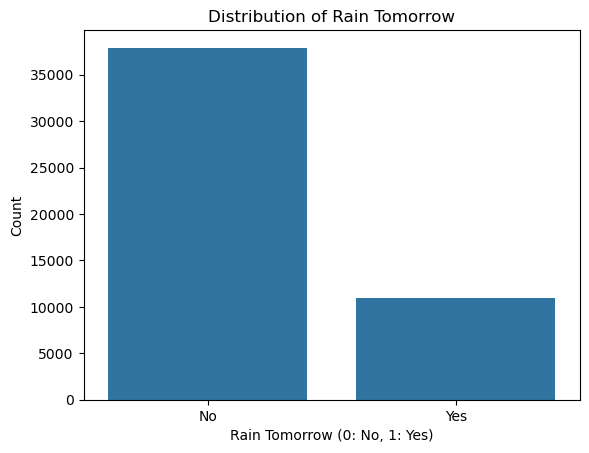

array(['No', 'Yes'], dtype=object)

In [150]:
sns.countplot(x='RainTomorrow', data=df)
plt.title('Distribution of Rain Tomorrow')
plt.xlabel('Rain Tomorrow (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()
df['RainToday'].unique()

In [9]:
df.columns.value_counts
df=df.convert_dtypes()
df['RainTomorrow']=df['RainTomorrow'].map({'No':0,'Yes':1}).astype(int)
df.dtypes

Location         string[python]
MinTemp                 Float64
MaxTemp                 Float64
Rainfall                Float64
Evaporation             Float64
Sunshine                Float64
WindGustDir      string[python]
WindGustSpeed             Int64
WindDir9am       string[python]
WindDir3pm       string[python]
WindSpeed9am              Int64
WindSpeed3pm              Int64
Humidity9am               Int64
Humidity3pm               Int64
Pressure9am             Float64
Pressure3pm             Float64
Cloud9am                  Int64
Cloud3pm                  Int64
Temp9am                 Float64
Temp3pm                 Float64
RainToday        string[python]
RISK_MM                 Float64
RainTomorrow              int64
Day                       Int32
Month                     Int32
dtype: object

In [10]:
x=df.drop(columns=['RainTomorrow','RISK_MM'],axis=1)
y=df['RainTomorrow']

cat=['Location','WindGustDir','WindDir9am','WindDir3pm','RainToday']

num=df.drop(columns=cat+['RainTomorrow','RISK_MM'],axis=1).columns



In [13]:
for i in cat:
    print(i,':',df[i].unique())

Location : <StringArray>
[           'Cobar',     'CoffsHarbour',            'Moree',
    'NorfolkIsland',           'Sydney',    'SydneyAirport',
       'WaggaWagga',      'Williamtown',         'Canberra',
             'Sale', 'MelbourneAirport',        'Melbourne',
          'Mildura',         'Portland',         'Watsonia',
         'Brisbane',           'Cairns',       'Townsville',
     'MountGambier',        'Nuriootpa',          'Woomera',
     'PerthAirport',            'Perth',           'Hobart',
     'AliceSprings',           'Darwin']
Length: 26, dtype: string
WindGustDir : <StringArray>
['SSW',   'S', 'NNE', 'WNW',   'N',  'SE', 'ENE',  'NE',   'E',  'SW',   'W',
 'WSW', 'NNW', 'ESE', 'SSE',  'NW']
Length: 16, dtype: string
WindDir9am : <StringArray>
['ENE', 'SSE', 'NNE', 'WNW',  'NW',   'N',   'S',  'SE',  'NE',   'W', 'SSW',
   'E', 'NNW', 'ESE', 'WSW',  'SW']
Length: 16, dtype: string
WindDir3pm : <StringArray>
[ 'SW', 'SSE', 'NNW', 'WSW', 'WNW',   'S', 'ENE',   'N',  

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=43)

preprocess=ColumnTransformer(
    transformers=[
        ('cat',OneHotEncoder(),cat),
        ('num',StandardScaler(),num)
    ]
)
pipe=Pipeline([
    ('step',preprocess),
    
    ('model',XGBClassifier(n_estimators=500,learning_rate=0.1,max_depth=5))
])
pipe.fit(x_train,y_train)
pred=pipe.predict(x_test)
print('Accuracy : ',np.round(accuracy_score(y_test,pred)*100,2),'%')



Accuracy :  85.76 %


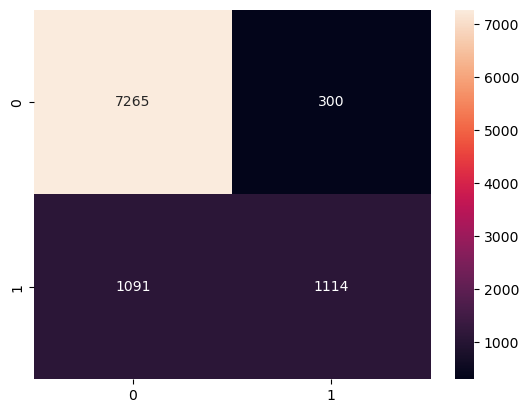

In [155]:
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='d')
plt.show()

In [ ]:
import joblib
joblib.dump(pipe,'weather_predict.pkl')

['weather_predict.pkl']

In [159]:
data= {
    'Location': 'Cairns',
    'MinTemp': 13.7,
    'MaxTemp': 27.6,
    'Rainfall': 0.0,
    'Evaporation': 6.6,
    'Sunshine': 11.1,
    'WindGustDir': 'NE',
    'WindGustSpeed': 24,
    'WindDir9am': 'W',
    'WindDir3pm': 'NE',
    'WindSpeed9am': 6,
    'WindSpeed3pm': 15,
    'Humidity9am': 69,
    'Humidity3pm': 53,
    'Pressure9am': 1017.8,
    'Pressure3pm': 1013.5,
    'Cloud9am': 1,
    'Cloud3pm': 1,
    'Temp9am': 20.7,
    'Temp3pm': 26.9,
    'RainToday': 'No',
    'Day': 4,
    'Month': 8
}



model=joblib.load("weather_predict.pkl")
output=model.predict(pd.DataFrame([data]))
if output==1:
    print('Tommorow will be rain in Austreliya')
else:
    print('Tommorow will not be rain in Austreliya')
    

Tommorow will not be rain in Austreliya


In [180]:
x_train.sample().T

,120041
Location,Perth
MinTemp,18.2
MaxTemp,34.9
Rainfall,0.0
Evaporation,5.0
Sunshine,9.1
WindGustDir,SSW
WindGustSpeed,28
WindDir9am,NNE
WindDir3pm,SW
